#### <img src="../figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>

# Classification and Regression Trees

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import numpy as np
plt.ioff() # pongo Interactive Mode Off
#plt.style.use('seaborn')

import os

ROOT_DIR = "/Users/vmac/cursos/ciencia_de_datos_general/notebooks2022"
IMAGES_PATH = os.path.join(ROOT_DIR, "figs")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Ejemplo: Breast Cancer Wisconsin (Diagnostic) Data Set

<center> Benigno <center> 
    
<table align='left'>
<tr>
<td><img src="./benign1.png" height="90%" width="90%"/></td>
<td><img src="./benign2.png" height="90%" width="90%"/></td>
<td><img src="./benign3.png" height="90%" width="90%"/></td>    
</tr>
</table>
<center> Maligno <center> 
<table align='left'>
<tr>
<td><img src="./malign1.png" height="90%" width="90%"/></td>
<td><img src="./malign2.png" height="90%" width="90%"/></td>
<td><img src="./malign3.png" height="90%" width="90%"/></td>    
</tr>
</table>

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
#print ('Features\n',cancer.feature_names)
#print ('Targets\n',cancer.target_names)
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
df = pd.DataFrame(cancer.data,columns=cancer.feature_names) 
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


### Algunas visualizaciones

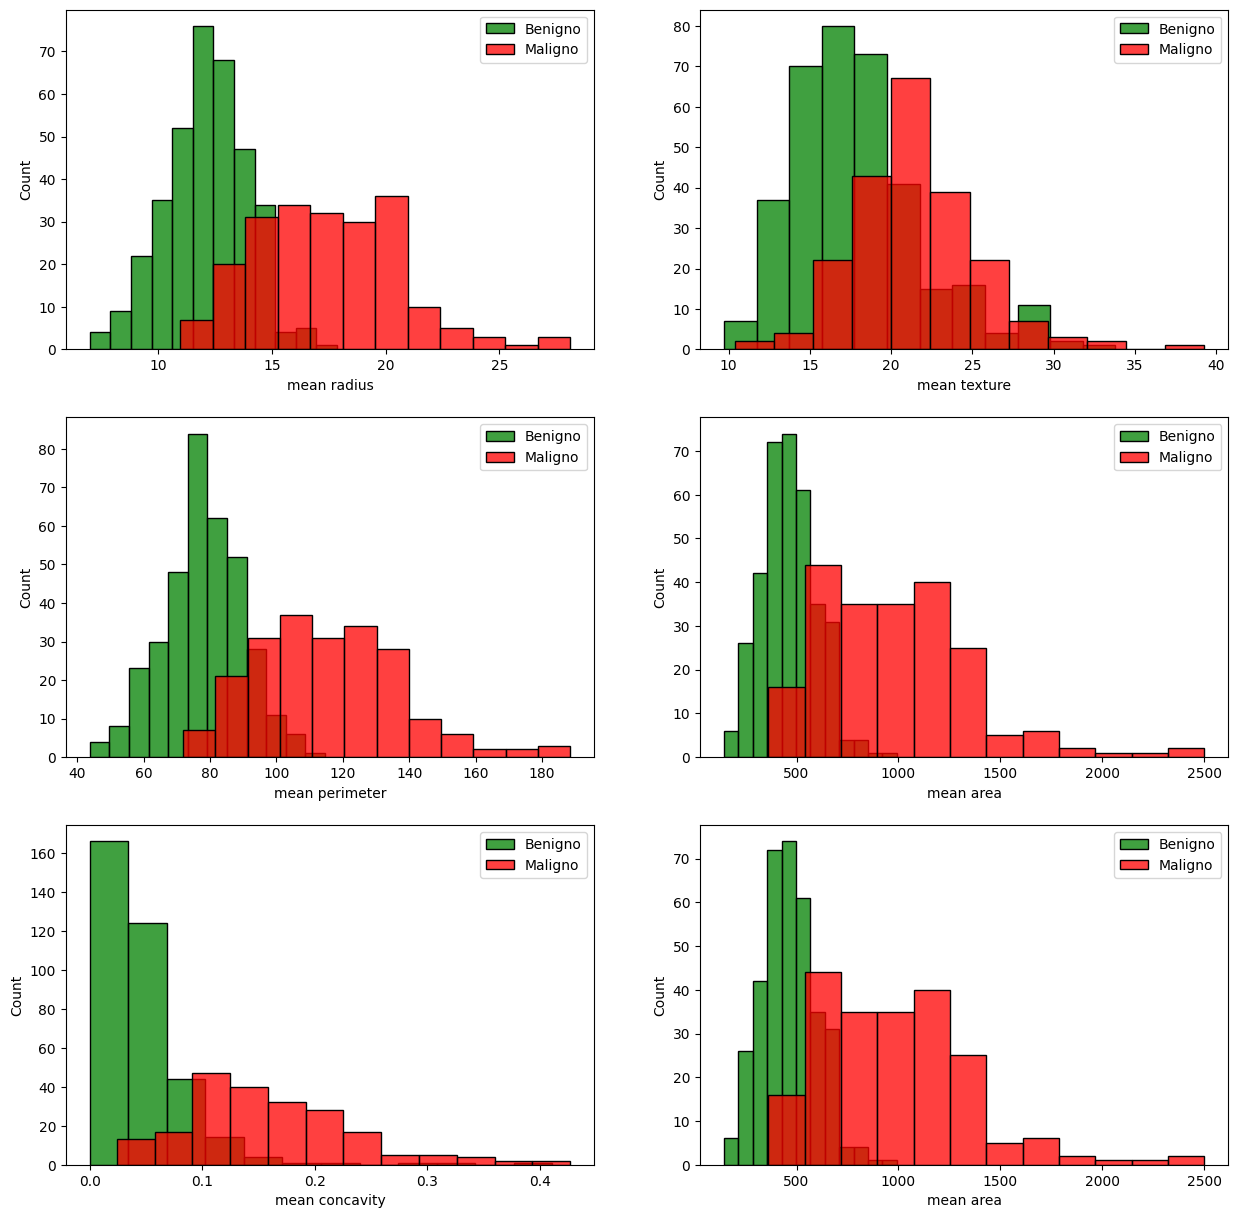

In [5]:
bins = 12
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.histplot(df[cancer.target==1]['mean radius'], bins=bins, color='green', label='Benigno')
sns.histplot(df[cancer.target==0]['mean radius'], bins=bins, color='red', label='Maligno')
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
sns.histplot(df[cancer.target==1]['mean texture'], bins=bins, color='green', label='Benigno')
sns.histplot(df[cancer.target==0]['mean texture'], bins=bins, color='red', label='Maligno')
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
sns.histplot(df[cancer.target==1]['mean perimeter'], bins=bins, color='green', label='Benigno')
sns.histplot(df[cancer.target==0]['mean perimeter'], bins=bins, color='red', label='Maligno')
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
sns.histplot(df[cancer.target==1]['mean area'], bins=bins, color='green', label='Benigno')
sns.histplot(df[cancer.target==0]['mean area'], bins=bins, color='red', label='Maligno')
plt.legend(loc='upper right')
plt.subplot(3, 2, 5)
sns.histplot(df[cancer.target==1]['mean concavity'], bins=bins, color='green', label='Benigno')
sns.histplot(df[cancer.target==0]['mean concavity'], bins=bins, color='red', label='Maligno')
plt.legend(loc='upper right')
plt.subplot(3, 2, 6)
sns.histplot(df[cancer.target==1]['mean area'], bins=bins, color='green', label='Benigno')
sns.histplot(df[cancer.target==0]['mean area'], bins=bins, color='red', label='Maligno')
plt.legend(loc='upper right')
plt.show()

### Árbol de clasificación sin regularización

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ctree = DecisionTreeClassifier(random_state=0)
ctree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(ctree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ctree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.881


### Overfitting y regularización.

Podado previo (Pre-prunning) mediante profundidad máxima y elementos mínimos en nodos.

In [7]:
ctree = DecisionTreeClassifier(max_depth=4, random_state=0)
ctree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ctree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ctree.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.902


[Text(0.5375, 0.9, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.325, 0.7, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.2, 0.5, 'x[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.1, 0.3, 'x[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.05, 0.1, 'gini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.15, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.3, 'x[18] <= 0.023\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.45, 0.5, 'x[29] <= 0.065\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.7, 'x[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.65, 0.5, 'x[21] <= 23.74\ngini = 0.491\nsamples

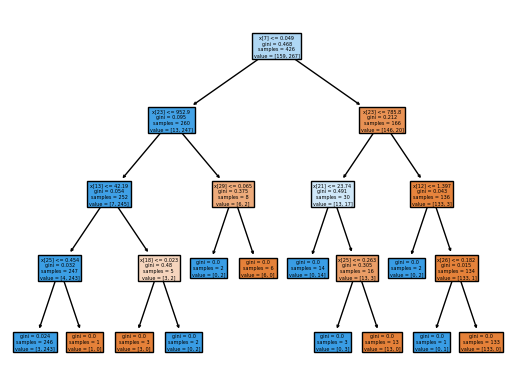

In [8]:
tree.plot_tree(ctree, filled=True)

Una mejor visualización con `graphviz`

In [9]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
        ctree,
        out_file=os.path.join(IMAGES_PATH, "tree_cancer.dot"),
        feature_names=cancer.feature_names,
        class_names=["malignant", "benign"],
        impurity=False, 
        rounded=True,
        filled=True
    )


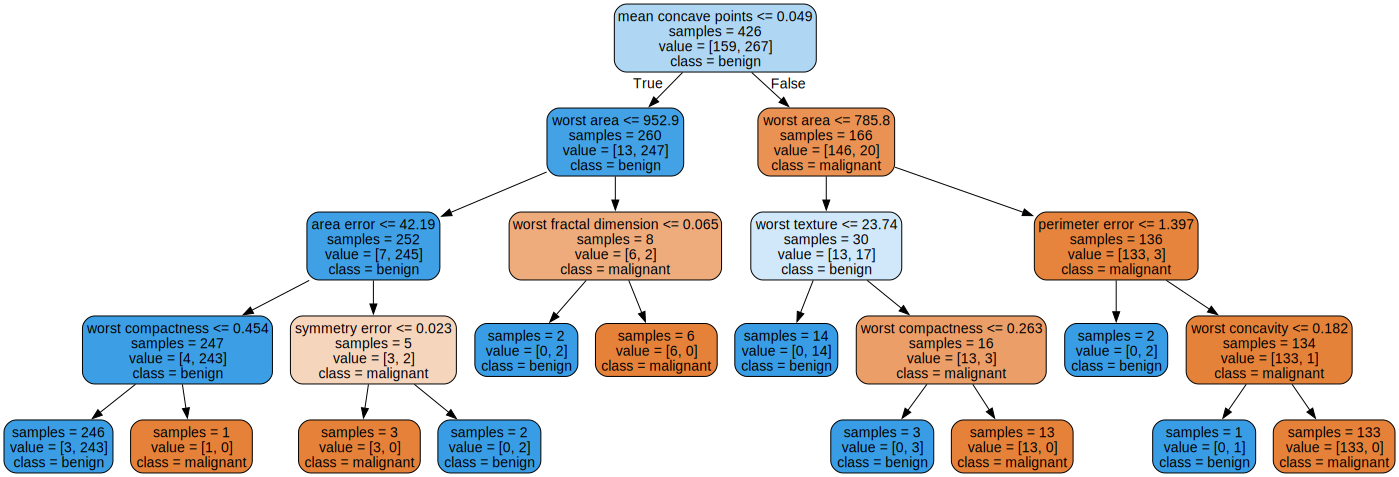

In [10]:
Source.from_file(os.path.join(IMAGES_PATH, "tree_cancer.dot"))
# en consola: dot -Tpng tree_cancer.dot -o tree_cancer.png

Restringiendo el número mínimo de datos para dividir un nodo

In [23]:
ctree = DecisionTreeClassifier(min_samples_leaf=12, random_state=0)
ctree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ctree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ctree.score(X_test, y_test)))

export_graphviz(
        ctree,
        out_file=os.path.join(IMAGES_PATH, "tree_cancer2.dot"),
        feature_names=cancer.feature_names,
        class_names=["malignant", "benign"],
        impurity=False, 
        rounded=True,
        filled=True
    )


Accuracy on training set: 0.960
Accuracy on test set: 0.937


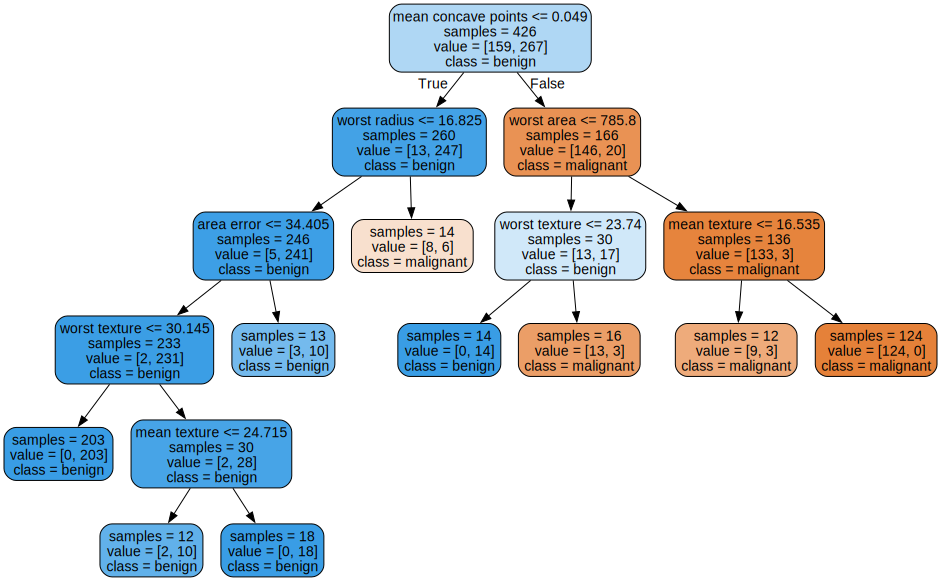

In [24]:
Source.from_file(os.path.join(IMAGES_PATH, "tree_cancer2.dot"))

## Overfitting y regularización.
### Podado posterior (Post-prunning) con Minimal Cost-Complexity Pruning (Breiman, 1984).

Obtenemos los valores de $\alpha$ relacionados con la ***ruta de poda*** del árbol relacionado con nuestros datos de entrenamiento.

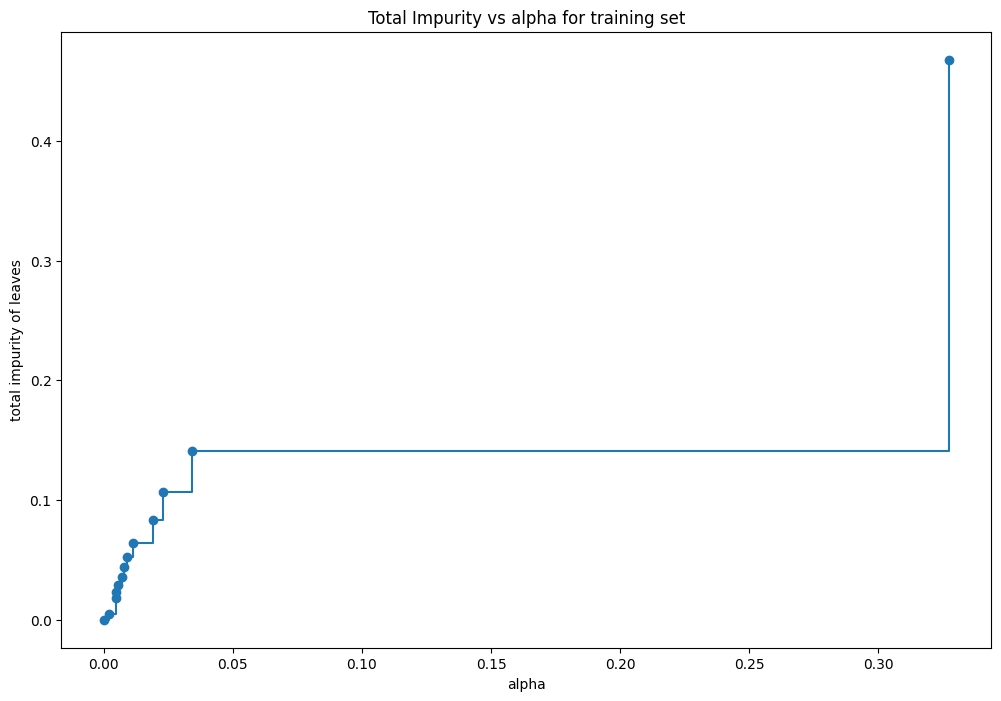

In [14]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs alpha for training set")
plt.show()

Observa que el valor más grande de $\alpha$ le corresponde al modelo más simple, es decir, un árbol con un solo nodo:

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


Por ésta razón, eliminamos ése árbol, y buscamos un valor en el rango de valores *"efectivo"* restante

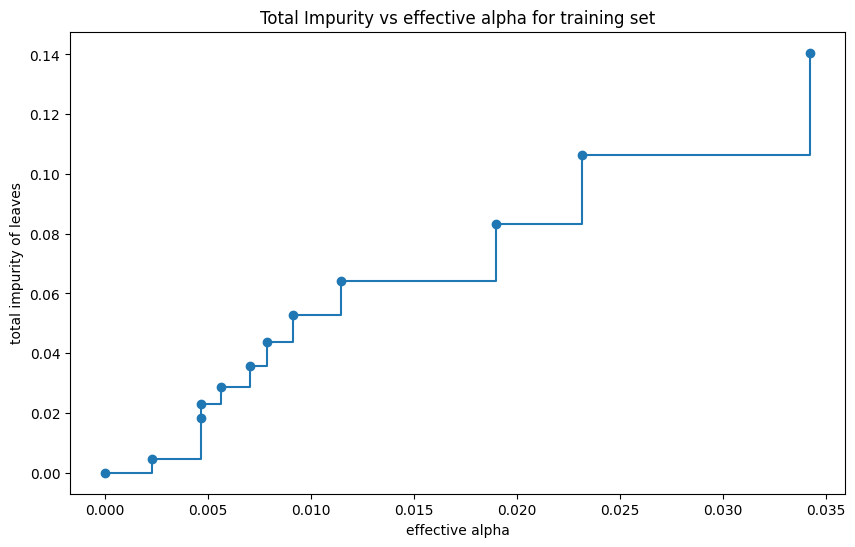

In [16]:
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Veamos la relación entre $\alpha$ y diferentes métricas de complejidad de los árboles correspondientes:

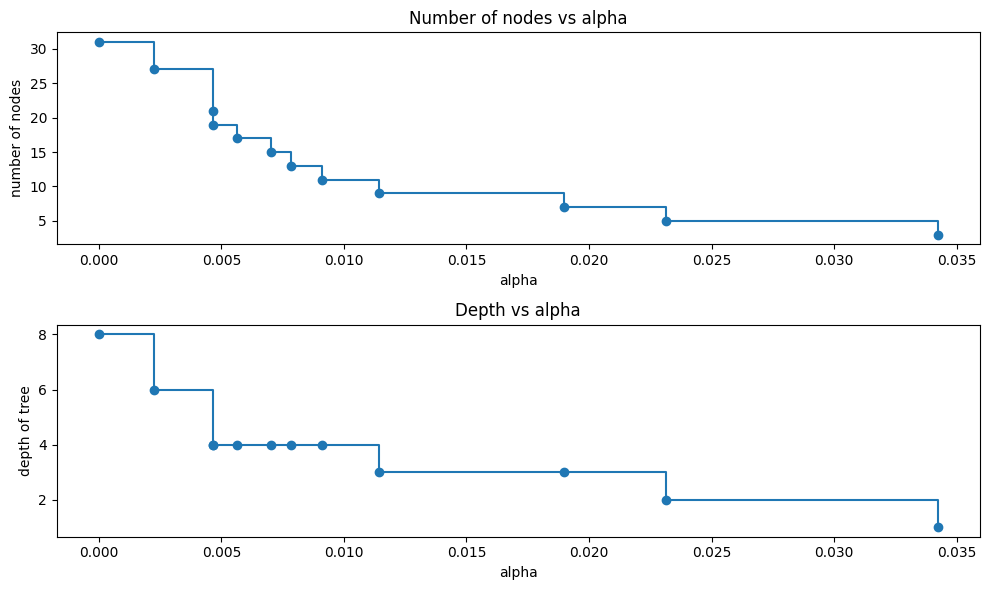

In [17]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

Finalmente, veamos la relación entre la precisión y $\alpha$ para los conjuntos de entrenamiento y prueba. Esto nos ayudará a elegir el modelo óptimo:

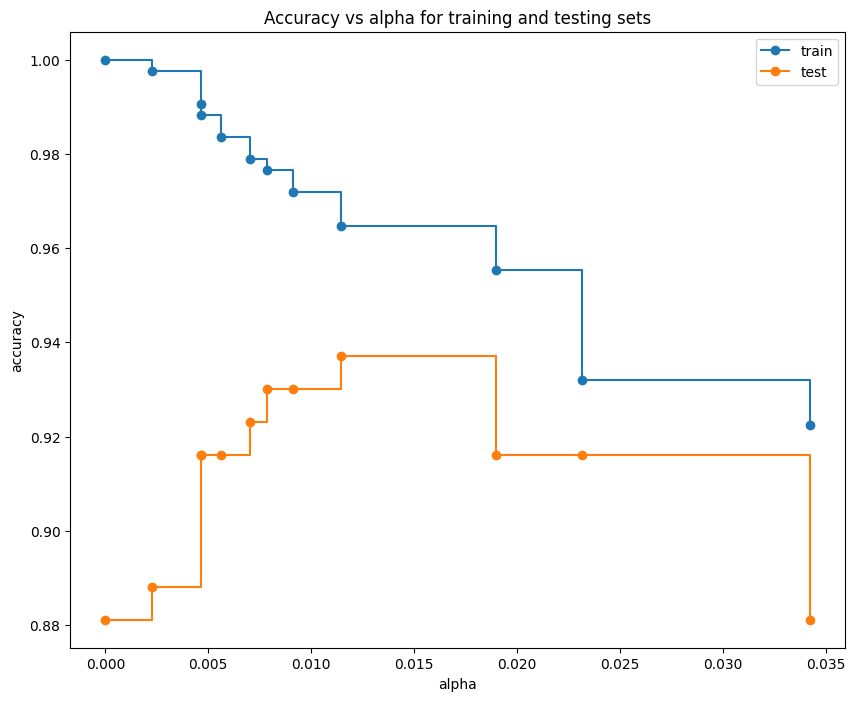

In [18]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.rcParams['figure.figsize'] = (10, 8)
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Equivalentemente, podemos ver error vs $\alpha$:

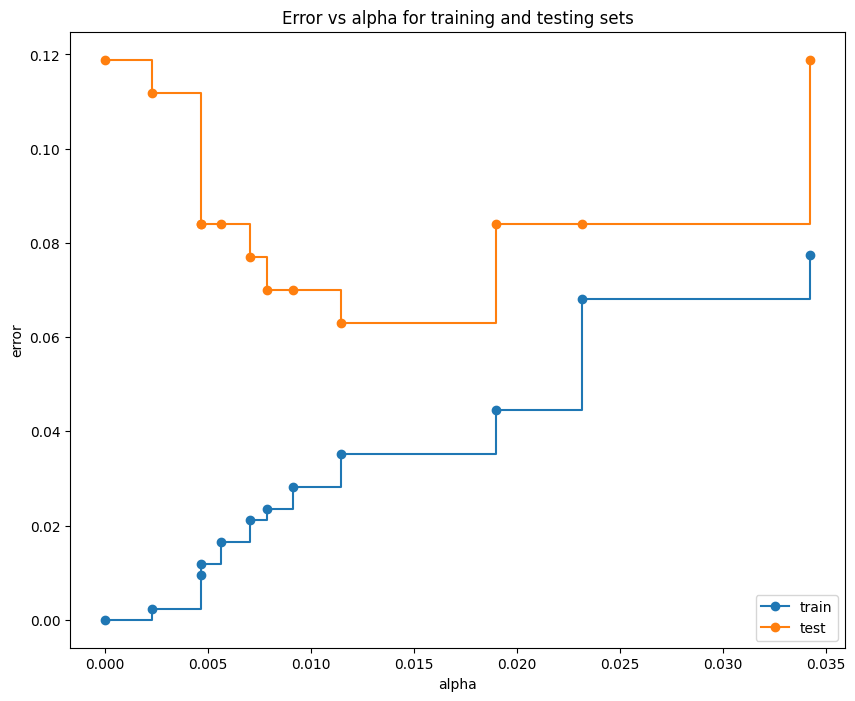

In [19]:
train_scores2 = [1-clf.score(X_train, y_train) for clf in clfs]
test_scores2 = [1-clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("error")
ax.set_title("Error vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores2, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores2, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Elegimos $\alpha^{*}$ y usamos el modelo correspondiente.

In [20]:
# el alpha optimo es el que maximiza la precisión de datos de prueba
alpha_val = ccp_alphas[np.argmax(test_scores)] 
# austamos el árbol correspondiente
alpha_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha_val)
alpha_tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(alpha_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(alpha_tree.score(X_test, y_test)))
print(alpha_val)

Accuracy on training set: 0.965
Accuracy on test set: 0.937
0.011443661971830986


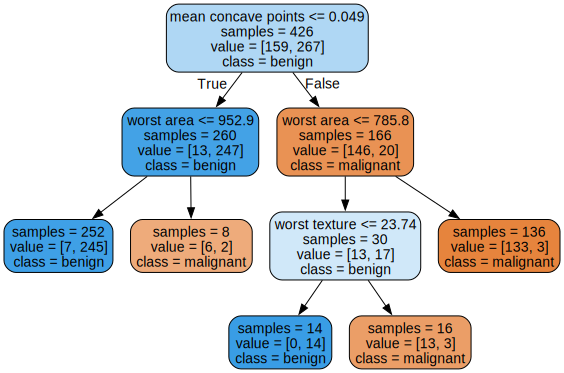

In [21]:
export_graphviz(
        alpha_tree,
        out_file=os.path.join(IMAGES_PATH, "tree_cancer3.dot"),
        feature_names=cancer.feature_names,
        class_names=["malignant", "benign"],
        impurity=False, 
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "tree_cancer3.dot"))

## Importancia de características

La medida de importancia que generalmente se usa para las variables usadas en la construcción del árbol es la reducción total de impureza (normalizada) obtenido al usar cada variable para dividir un nodo en el árbol resultante. 

Esta medida refleja la capacidad de discriminación de cada variable, y está relacionada generalmente con la jerarquía de niveles del árbol. Una variable que se usa para crear muchas ramas del árbol es más importante generalmente, pero depende de la reducción de impureza que se logra con la creación de cada rama.

Para el árbol óptimo que construimos en los datos de cáncer, las variables discriminativas son

In [23]:
print("Feature importances:")
print(alpha_tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.90533181 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.09466819
 0.         0.         0.         0.         0.         0.        ]


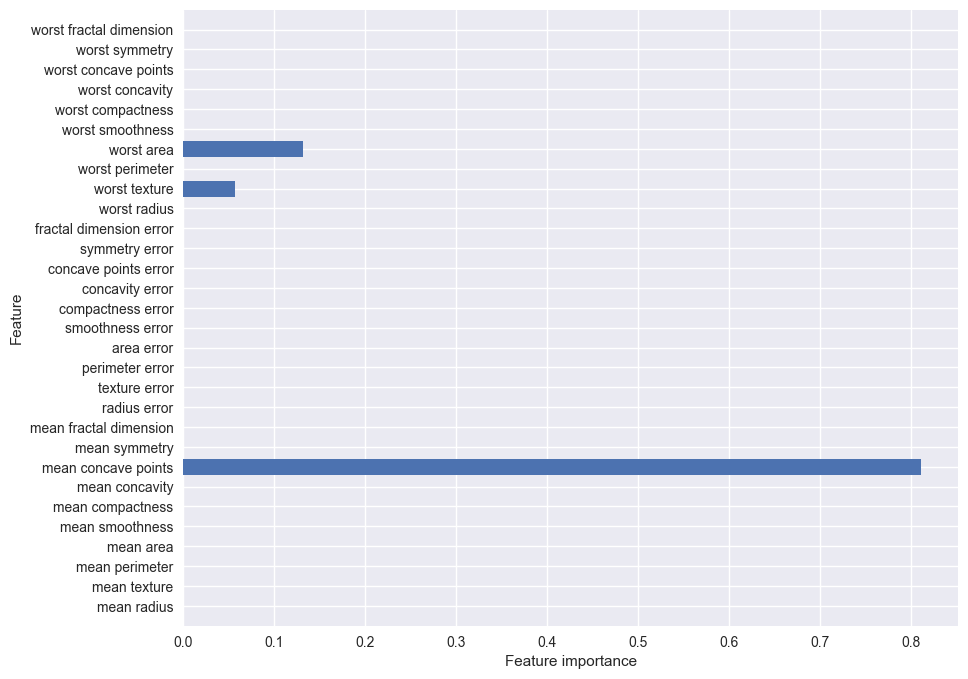

In [30]:
n_features = cancer.data.shape[1]
plt.rcParams['figure.figsize'] = (10, 8)
plt.barh(np.arange(n_features), alpha_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

Puedes hacer lo mismo para otros valores de $\alpha$, o incluso para otros criterios de construcción del árbol, lo que puede ayudarte a obtener modelos descriptivos, es decir, describir diferentes aspectos de las variables respecto al modelo en particular.